In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

plt.style.use('ggplot')
%matplotlib inline

In [3]:
recent_grads = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-10-16/recent-grads.csv")
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### Columns and their data types

In [34]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

### Median Salary distribution -> looks interesting 

<AxesSubplot:xlabel='Median', ylabel='Count'>

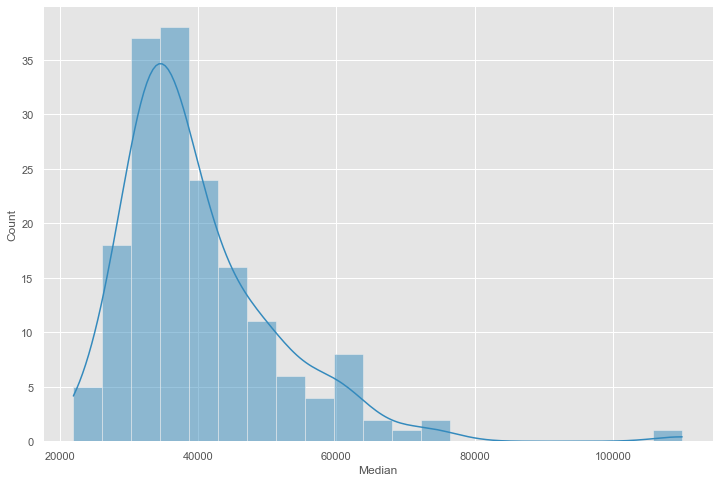

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(recent_grads['Median'], kde = True, ax = ax)

In [28]:
recent_grads['Median'].mean()

40151.4450867052

## What category of majors make the most money?

#### Can look at boxplot and barplot per major_category to understand the distributions in each category. 

Instead of showing a histogram, I can summarize and groupby the major_category to get the median salary for each major_category. 

In [43]:
median_per_major = recent_grads[['Median', 'Major_category']].groupby('Major_category').median().sort_values('Median', ascending=False)
median_per_major

,Median
Major_category,
Engineering,57000
Computers & Mathematics,45000
Business,40000
Physical Sciences,39500
Social Science,38000
Biology & Life Science,36300
Law & Public Policy,36000
Agriculture & Natural Resources,35000
Communications & Journalism,35000


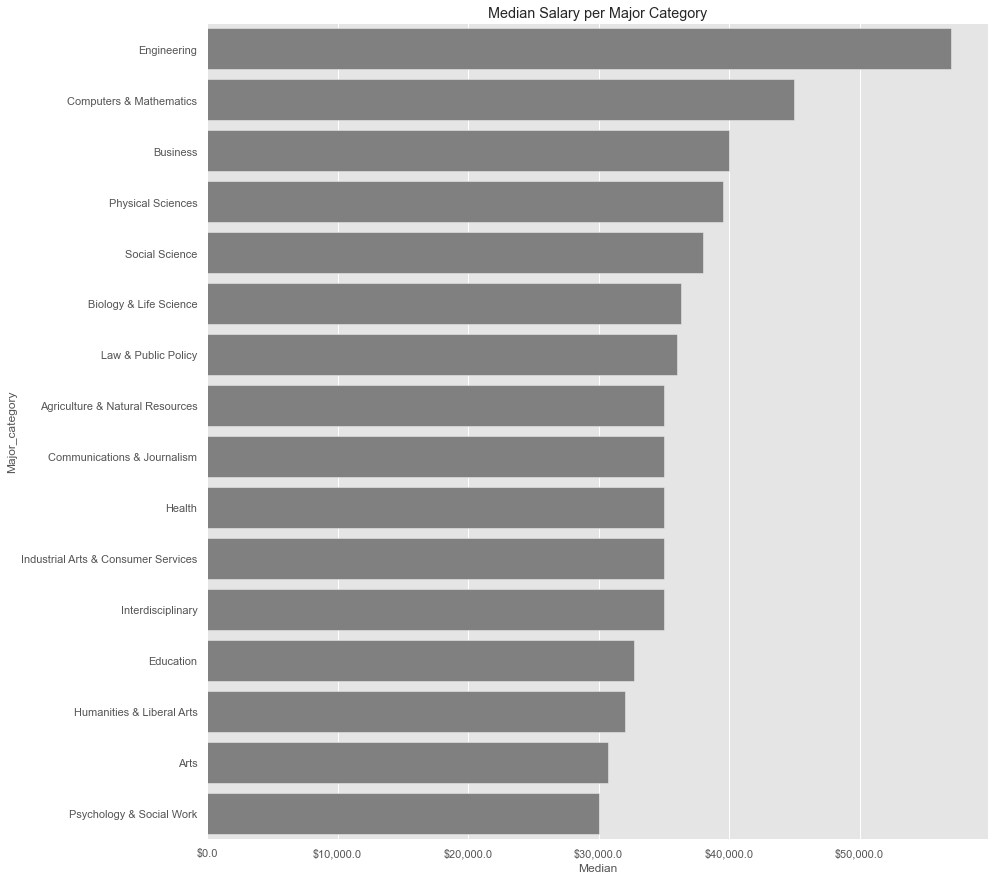

In [61]:
fig, ax = plt.subplots(figsize=(14, 15))
sns.barplot(x = median_per_major['Median'], y = median_per_major.index, color='grey')
ax.set_title('Median Salary per Major Category')
ax.xaxis.set_major_formatter('${x:,}')

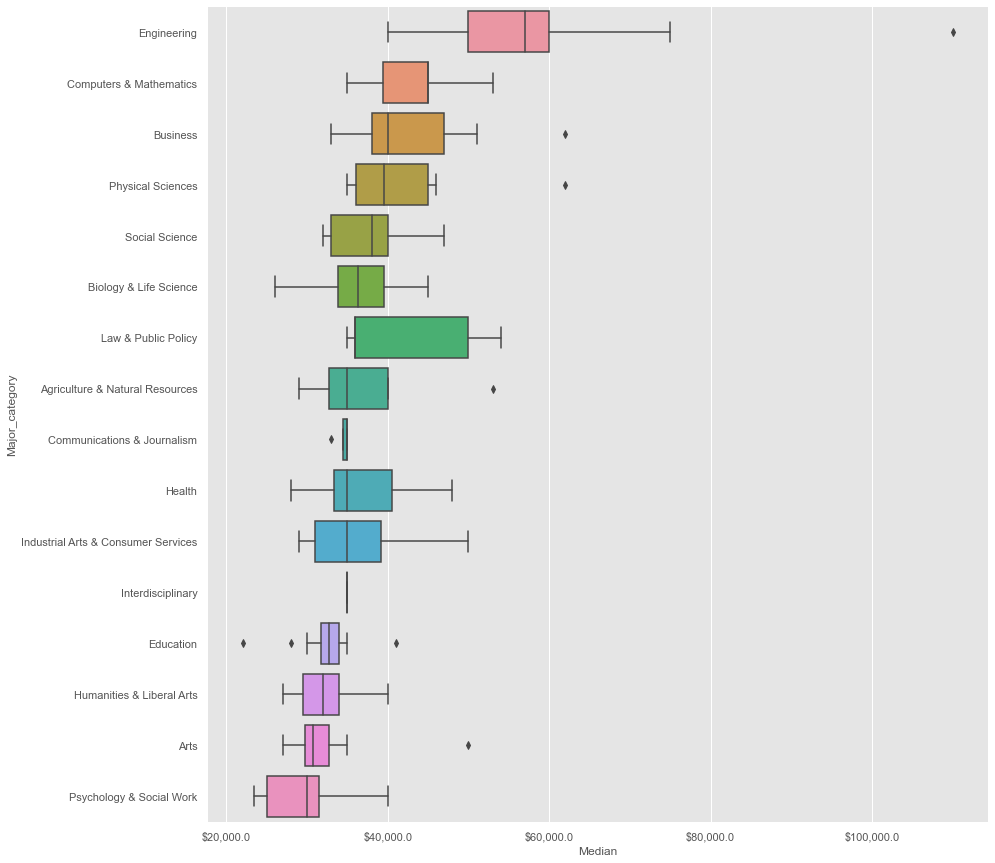

In [62]:
fig, ax = plt.subplots(figsize=(14, 15))
sns.boxplot(x = recent_grads['Median'], y = recent_grads['Major_category'], ax = ax, order = median_per_major.index.to_list())
ax.xaxis.set_major_formatter('${x:1,}')


A spectrum from STEM to liberal arts can be observed in terms of Median Salary

**NOTE :** I prefer box plots over bar plots. Box plots gives more information about distribution and bar plots are useful for explaining to users who don't have technical knowledge on how to read box plots.

## What are the highest earning majors?

Keep in mind we are looking at top 20 majors only and the not categories like in previous section

In [66]:
top_majors = recent_grads[['Major', 'Major_category','Median', 'P25th', 'P75th']].sort_values('Median', ascending = False).head(20)
top_majors

,Major,Major_category,Median,P25th,P75th
0,PETROLEUM ENGINEERING,Engineering,110000,95000,125000
1,MINING AND MINERAL ENGINEERING,Engineering,75000,55000,90000
2,METALLURGICAL ENGINEERING,Engineering,73000,50000,105000
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,70000,43000,80000
4,CHEMICAL ENGINEERING,Engineering,65000,50000,75000
5,NUCLEAR ENGINEERING,Engineering,65000,50000,102000
6,ACTUARIAL SCIENCE,Business,62000,53000,72000
7,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,62000,31500,109000
10,COMPUTER ENGINEERING,Engineering,60000,45000,75000
13,MATERIALS SCIENCE,Engineering,60000,39000,65000


Looks like petroleum engineering is an outlier if you compare the box plot for histogram and the above table (110k salary). 

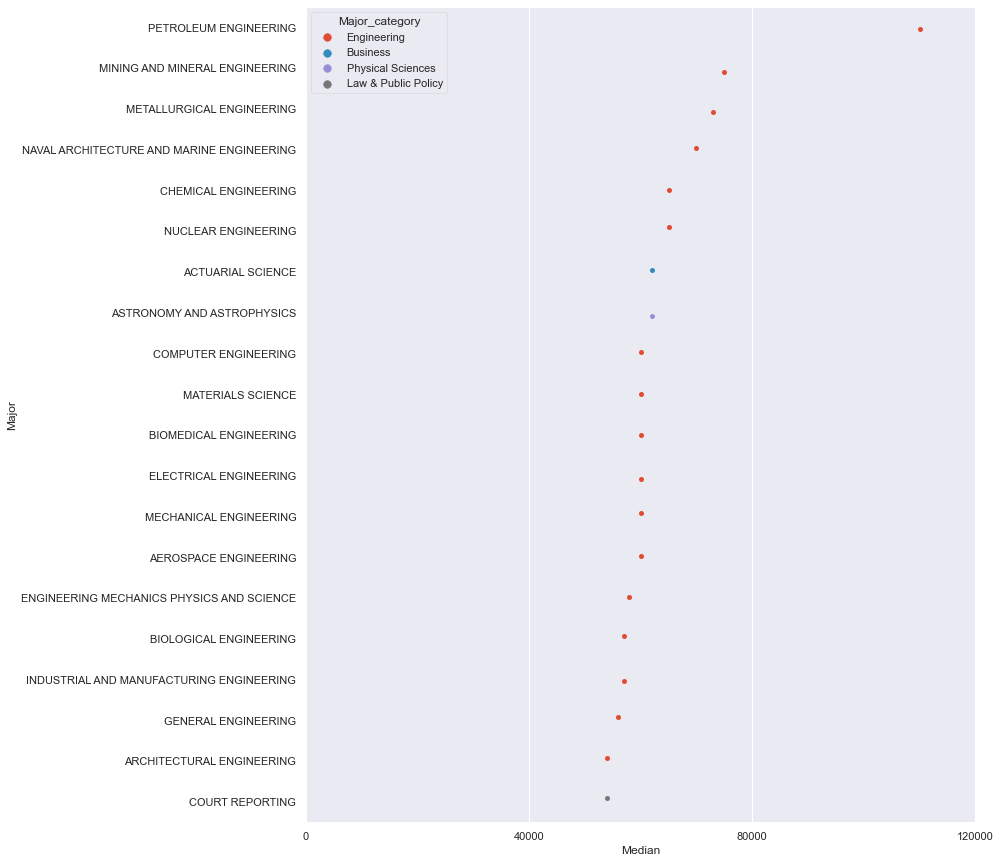

In [114]:
fig, ax = plt.subplots(figsize=(12, 15))
sns.stripplot(y = top_majors['Major'], x = top_majors['Median'], hue = top_majors['Major_category'], ax = ax)
ax.set_xticks([0, 40000, 80000, 120000]);

## What are the lowest earning majors?

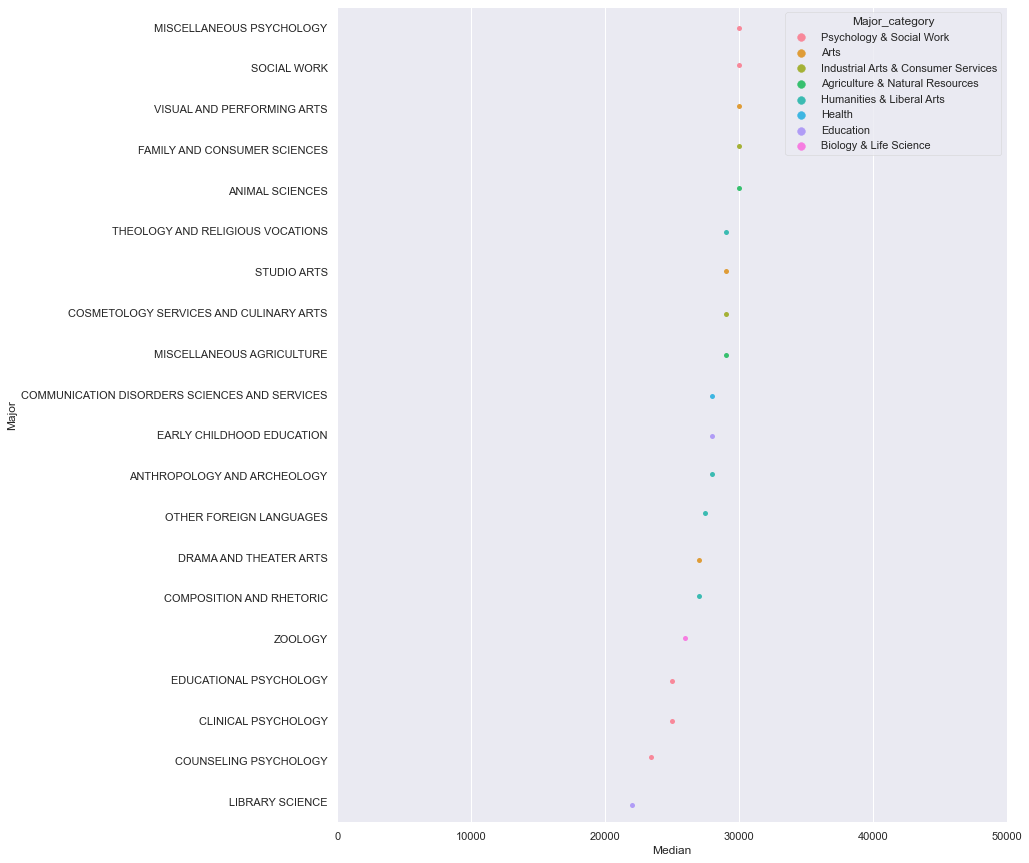

In [115]:
low_majors = recent_grads[['Major', 'Major_category','Median', 'P25th', 'P75th']].sort_values('Median', ascending = False).tail(20)
fig, ax = plt.subplots(figsize=(12, 15))
sns.stripplot(y = low_majors['Major'], x = low_majors['Median'], hue = low_majors['Major_category'], ax = ax)
ax.set_xticks([0, 10000, 20000, 30000, 40000, 50000]);